<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_randomforest_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Randomforest regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:
# Generate a regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.1,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [3]:
# Train a Random Forest Regressor
random_forest = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Allow trees to grow fully
    random_state=42,
    n_jobs=-1          # Use all processors
)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Plot true vs predicted values
sorted_indices = np.argsort(y_test)  # Sort for visualization




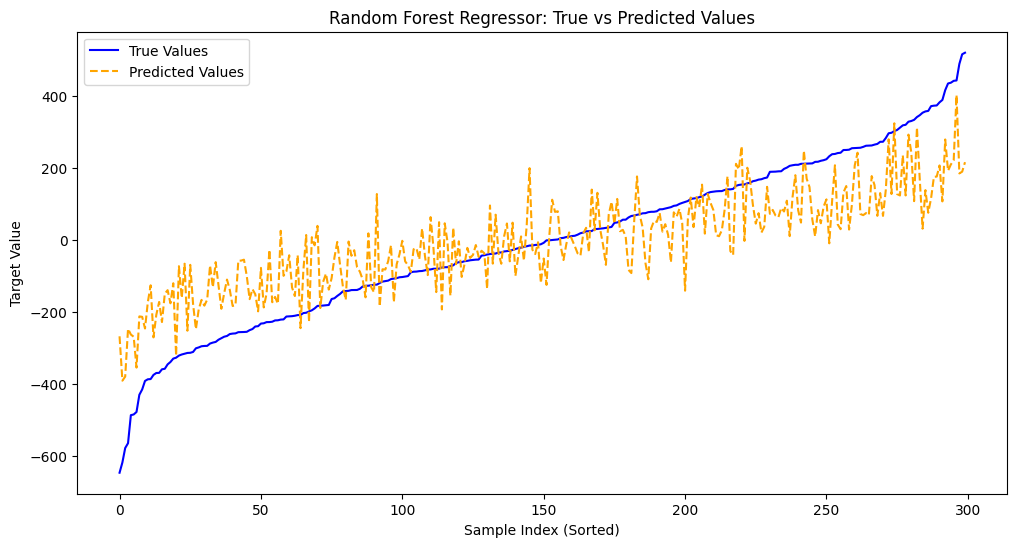

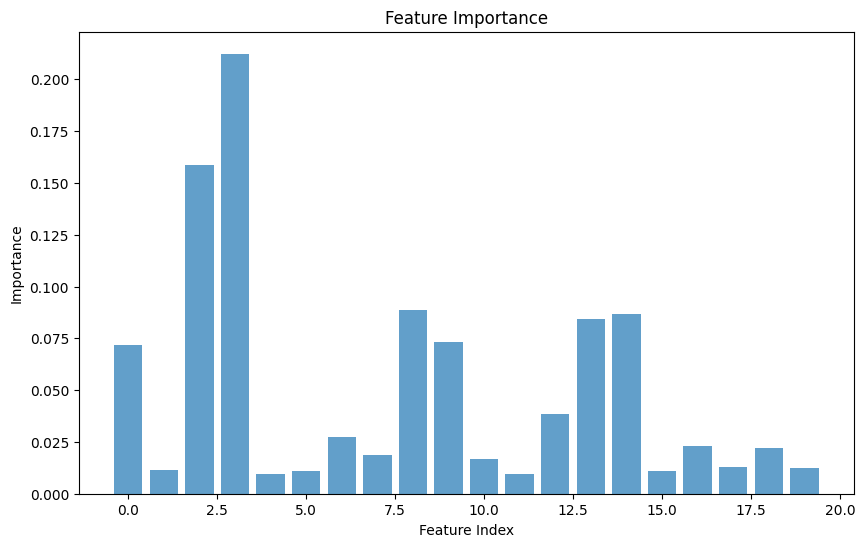

Mean Squared Error (Random Forest): 17137.6945


In [4]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_test)), y_test[sorted_indices], label="True Values", color="blue")
plt.plot(np.arange(len(y_test)), y_pred_rf[sorted_indices], label="Predicted Values", color="orange", linestyle="--")
plt.title("Random Forest Regressor: True vs Predicted Values")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# Feature Importance Plot
feature_importances = random_forest.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances, alpha=0.7)
plt.title("Feature Importance")
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

# Display MSE
print(f"Mean Squared Error (Random Forest): {mse_rf:.4f}")